In [4]:
!pip install pandas numpy matplotlib scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 639.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 2.0 MB/s eta 0:00:06
    --------------------------------------- 0.2/11.0 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.0 MB 4.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.0 MB 7.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.0 MB 10.4 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/11.0 MB 12.8 MB/s eta 0:00:01
   --------------- ------------------------ 4.3/11.0 MB 14.4 MB/s eta 0:00:01
   ------------------ --------------------- 5.1/11.0 MB 14.7 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
store_data = pd.read_csv("./datasets/Mall_Customers.csv")

In [ ]:
from sklearn.cluster import KMeans

X1 = store_data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

c:\Users\brand\Documents\agora\data_cleaning\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


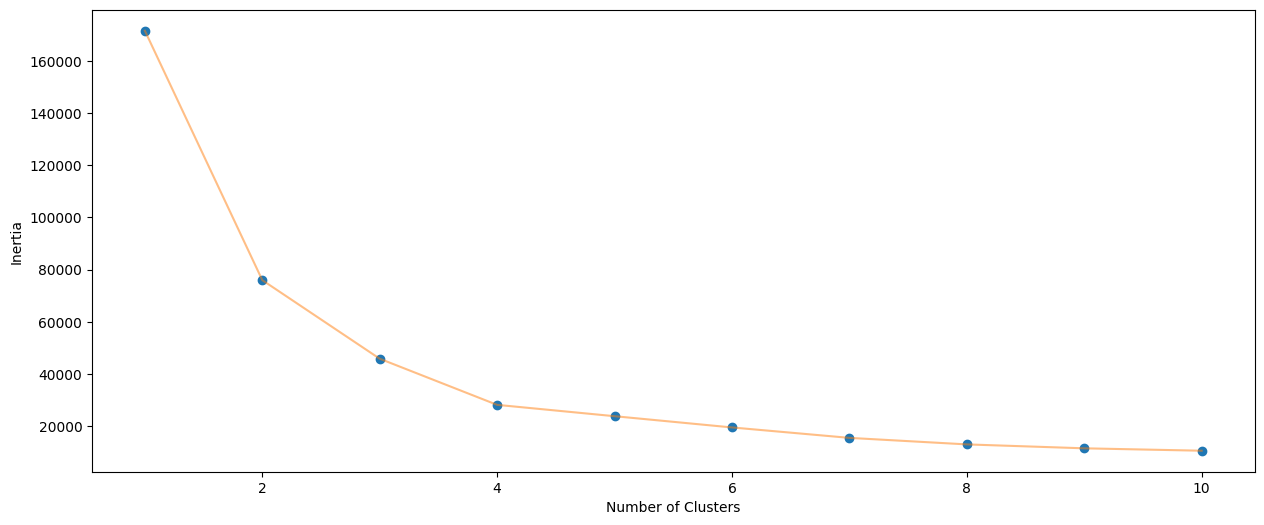

In [10]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

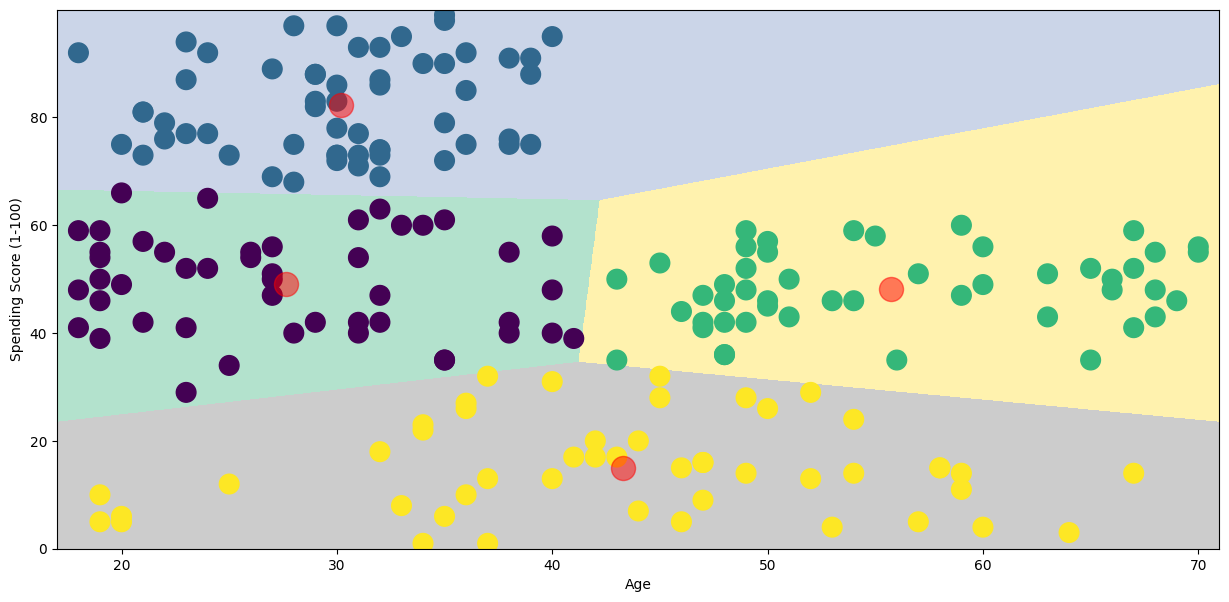

In [11]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = store_data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()